In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Folders Name inside train dataset

- 0 - Angry
- 1 - Disgust
- 2 - Fear
- 3 - Happy
- 4 - Neutral
- 5 - Sad
- 6 - Surprise"

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2024-12-06 13:24:28.362741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733470768.390123   18033 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733470768.398067   18033 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 13:24:28.428476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Check if GPUs are available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs are available: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs are available.")




Num GPUs Available:  1
GPUs are available: ['/physical_device:GPU:0']


In [3]:
img_array = cv2.imread("Image_Dataset/train/0/0.jpg")

In [4]:
img_array.shape # rgb

(48, 48, 3)

- when you load an image in OpenCV using cv2.imread(), the color channels are stored in BGR order, not RGB.

In [5]:
print(img_array)

[[[ 72  72  72]
  [ 78  78  78]
  [ 81  81  81]
  ...
  [ 52  52  52]
  [ 43  43  43]
  [ 40  40  40]]

 [[ 65  65  65]
  [ 62  62  62]
  [ 59  59  59]
  ...
  [ 55  55  55]
  [ 52  52  52]
  [ 45  45  45]]

 [[ 47  47  47]
  [ 42  42  42]
  [ 60  60  60]
  ...
  [ 47  47  47]
  [ 54  54  54]
  [ 49  49  49]]

 ...

 [[ 91  91  91]
  [ 65  65  65]
  [ 46  46  46]
  ...
  [ 74  74  74]
  [ 54  54  54]
  [ 43  43  43]]

 [[ 76  76  76]
  [ 80  80  80]
  [ 76  76  76]
  ...
  [108 108 108]
  [ 69  69  69]
  [ 46  46  46]]

 [[ 77  77  77]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [105 105 105]
  [108 108 108]
  [ 82  82  82]]]


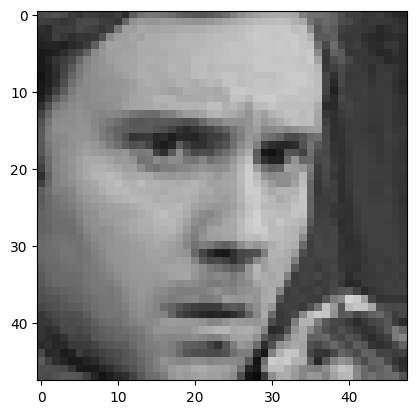

In [6]:
plt.imshow(img_array) # brg

In [7]:
data_directory = "Image_Dataset/train/" # Training Dataset

In [8]:
classes = ['0','1','2','3','4','5','6'] # list of classes [exact names of folders inside train folder]

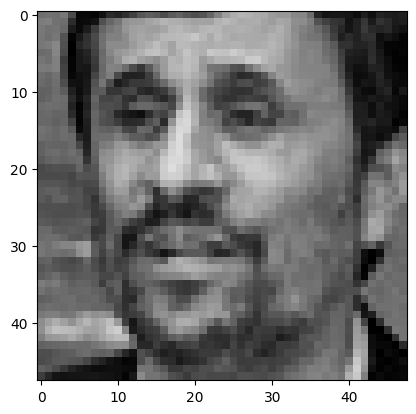

In [9]:
for category in classes: 
    '''The classes variable is expected to be a 
list or iterable containing category names (['0', '1', '2','3','4','5','6']). 
This loop iterates over each class in the dataset.'''
    
    path = os.path.join(data_directory, category) 
    '''Combines the base directory (data_directory) 
    with the current category name (category) to create a full path to that category's folder.'''
    
    for img in os.listdir(path): 
        '''Lists all image files in the path directory (the category folder).
    This loop will iterate over the filenames of images in the category folder.'''
         
        img_array = cv2.imread(os.path.join(path,img)) 
        '''Reads the image using cv2.imread() at the path
        formed by joining path and img. The result is stored in img_array, 
        which will be a NumPy array representing the image.'''

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) 
        '''cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) converts the image
        from BGR (OpenCV default) to RGB (common for displaying images in libraries like Matplotlib).
        plt.imshow() is used to display the image using Matplotlib.'''

        plt.show() 
        '''This command displays the image using Matplotlib’s default viewer.
                      The image will appear in a pop-up window.'''
        
        break 
        '''The first break is inside the image loop. It breaks out of the 
                 inner loop after displaying justone image from the path directory.
                 
                 The second break is inside the category loop. It breaks out of the outer 
                 loop after processing just one image from the first category, meaning only one image
                 from the first category will be displayed.
'''
    break

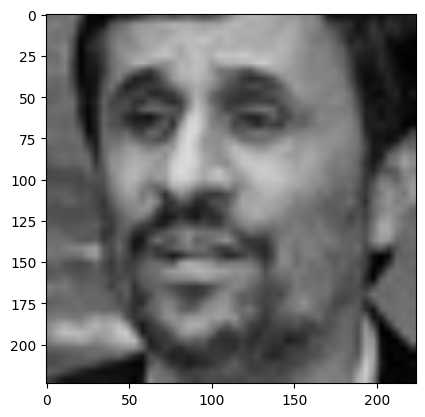

In [10]:
img_size = 224
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)) 
plt.show()

In [11]:
img_array.shape 

(48, 48, 3)

- `48 (Height)`: The number of pixels along the vertical axis (image height).
- `48 (Width)`: The number of pixels along the horizontal axis (image width).
- `3 (Channels)`: The number of color channels. In the case of color images:
    - 3 channels represent the `Red, Green, and Blue` channels in the RGB color space.


## Read all images and convert them to an array

In [12]:
training_data = [] #data array

valid_extensions = ('.jpg', '.jpeg', '.png')

def creating_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category)  # 0,1,2,3,4,5,6

        for img in os.listdir(path):
            if img.startswith('.ipynb'):  # Skip hidden files
                continue
            if not img.endswith(valid_extensions):  # Check for valid extensions
                continue
            try:
                img_array = cv2.imread(os.path.join(path, img))
                if img_array is None:
                    continue
                # Resize the image to a fixed size (48x48)
                new_array = cv2.resize(img_array, (img_size, img_size))
                # Append image array and class number to training_data
                training_data.append([img_array, class_num])

            except Exception as e:
                print(f"Error processing image {img}: {e}")
        

In [13]:
creating_training_data()

In [14]:
print(len(training_data))

28821


In [15]:
new_array.shape

(224, 224, 3)

In [16]:
import random

random.shuffle(training_data)

- Shuffling `training_data` randomly because we don't want our model to learn sequencially but learn dynamically and making training dataset robust .

In [17]:
# Convert the training data to a NumPy array
X = np.array([item[0] for item in training_data])  # Images
y = np.array([item[1] for item in training_data])  # Labels


In [18]:
X.shape 

(28821, 48, 48, 3)

## Normalization

In [19]:
# Normalize the images to [0, 1]
X_nm = X/255.0  #Normalizing pixel value

In [20]:
print(f"Min pixel value: {X.min()}, Max pixel value: {X.max()}")


Min pixel value: 0, Max pixel value: 255


In [21]:
y.shape

(28821,)

In [22]:
y[0] # We shuffle labels randomly so output can come random 0 - 6

np.int64(3)

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Spliting the train and test dataset

In [24]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_nm, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(23056, 48, 48, 3)

### One-Hot encoding the labels/Targets

In [26]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

## Building Deep learning models for Training

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

class_num = len(classes)  # Number of classes (emotions)

# Create the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

## Convolutional Layer 3 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting

# Output Layer
model.add(Dense(class_num, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/home/namling/My_programs/Face and Emotion Recognition System (Project I)/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733470801.269247   18033 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


###  Compiling the Model

In [28]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,447 (802.53 KB)

 Trainable params: 205,191 (801.53 KB)

 Non-trainable params: 256 (1.00 KB)

### Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # the rotation range
    width_shift_range=0.1,  # the width shift
    height_shift_range=0.1,  #  the height shift
    shear_range=0.1,  #  shear
    zoom_range=0.1,  #  zoom
    horizontal_flip=True,
    fill_mode='nearest'
)


# Fit the datagen on X_train (optional for normalization)
datagen.fit(X_train)

In [30]:
# train generator that yields augmented data in batches
train_generator = datagen.flow(X_train, y_train, batch_size=32)



### Training the Model

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_generator, epochs=25, steps_per_epoch = len(X_train) // 32
, validation_data=(X_test, y_test), callbacks=[early_stopping])


/home/namling/My_programs/Face and Emotion Recognition System (Project I)/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


I0000 00:00:1733470813.254381   18232 service.cc:148] XLA service 0x7d5530011d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733470813.254740   18232 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-12-06 13:25:13.337108: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733470813.638837   18232 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/720 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.0668 - loss: 6.8457

I0000 00:00:1733470817.672751   18232 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


718/720 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2075 - loss: 4.4984

2024-12-06 13:25:37.733320: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159390720 exceeds 10% of free system memory.
2024-12-06 13:25:37.874675: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159390720 exceeds 10% of free system memory.


720/720 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.2077 - loss: 4.4941 - val_accuracy: 0.3202 - val_loss: 2.1282
Epoch 2/25
  1/720 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3125 - loss: 2.2786

/home/namling/My_programs/Face and Emotion Recognition System (Project I)/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3125 - loss: 2.2786 - val_accuracy: 0.3199 - val_loss: 2.1269
Epoch 3/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3132 - loss: 1.9779 - val_accuracy: 0.1450 - val_loss: 2.1059
Epoch 4/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.3750 - loss: 1.7550 - val_accuracy: 0.1422 - val_loss: 2.1147
Epoch 5/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.3855 - loss: 1.7423 - val_accuracy: 0.3953 - val_loss: 1.7415
Epoch 6/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.3438 - loss: 1.8119 - val_accuracy: 0.3906 - val_loss: 1.7475
Epoch 7/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4044 - loss: 1.7054 - val_accuracy: 0.3806 - val_loss: 1.9707
Epoch 8/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4688 - loss: 1.6189 - val_accuracy: 0.3918 - val_loss: 1.8649
Epoch 9/25
720/720 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4264 - loss: 1.6758 - val_accuracy: 0

In [ ]:
# Save the model after training
model.save('emotion_recognition_model_tf.keras')

### Evaluating the model

In [ ]:
# Access accuracy and loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()
